# Practical 1
## Non-linear Dynamics

### 1
#### a.

In [1]:
'''
Finding the square root of 2:
f(x) = x^2 - 2 = 0
f'(x) = 2x
Initial guess: x_0 = 1.4
By Newton's method:
x_1 = x_0 - f(x_0) / f'(x_0)
x_1 = 1.4 - f(1.4) / f'(1.4)
x_1 = 1.4 - (1.4^2 - 2) / 2 * 1.4
x_1 = 1.414285714
x_2 = 1.414285714 - f(1.414285714) / f'(1.414285714)
x_2 = 1.414213564
x_3 = 1.414213564 - f(1.414213564) / f'(1.414213564)
x_3 = 1.414213562
'''

"\nFinding the square root of 2:\nf(x) = x^2 - 2 = 0\nf'(x) = 2x\nInitial guess: x_0 = 1.4\nBy Newton's method:\nx_1 = x_0 - f(x_0) / f'(x_0)\nx_1 = 1.4 - f(1.4) / f'(1.4)\nx_1 = 1.4 - (1.4^2 - 2) / 2 * 1.4\nx_1 = 1.414285714\nx_2 = 1.414285714 - f(1.414285714) / f'(1.414285714)\nx_2 = 1.414213564\nx_3 = 1.414213564 - f(1.414213564) / f'(1.414213564)\nx_3 = 1.414213562\n"

#### b.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the function
def f(x):
    return x * np.exp(-x) + 1
# And the derivative:
def fp(x):
    return (1 - x) * np.exp(-x)

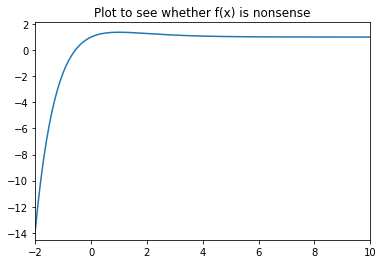

In [4]:
# Plot to check function
x = np.arange(-20, 110) * 0.1
plt.plot(x, f(x))
plt.title("Plot to see whether f(x) is nonsense")
plt.xlim([-2, 10])
plt.show()

As we can see, the function has a root somewhere between -1 and 0.

In [5]:
# Newton's Method
# Initial guess:
x = -0.5

# Run for 10 iterations, this will almost always converge regardless of initial condition
for n in range(10):
    x = x - f(x) / fp(x)
print("Root: {}".format(x))
print("Check by filling it in f: {}".format(f(x)))

Root: -0.5671432904097838
Check by filling it in f: 0.0


#### c.

In [6]:
# Plot to check values for a:
def plot(x, y):
    plt.plot(x, y)
    plt.title("Plot to see whether f(x, a) is nonsense")
    plt.xlim([-2, 10])
    plt.show()

# Redefine the function with added parameter a
def g(x, a):
    return x * np.exp(-x) + a

a: -1.0


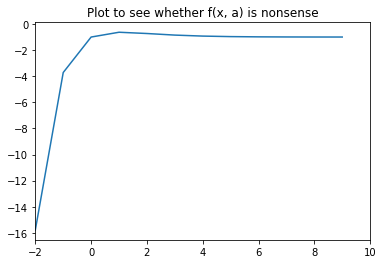

a: -0.9


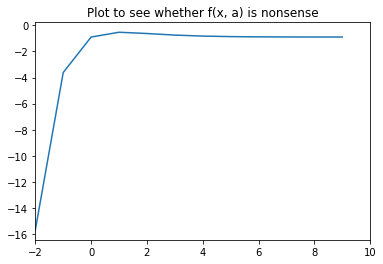

a: -0.8


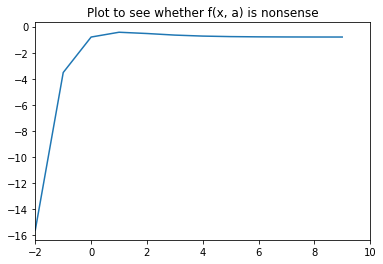

a: -0.7000000000000001


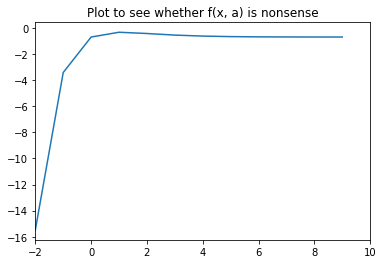

a: -0.6000000000000001


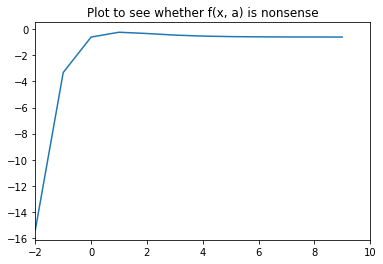

a: -0.5


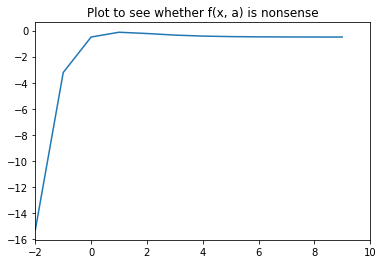

a: -0.4


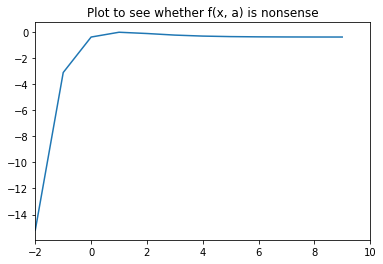

a: -0.30000000000000004


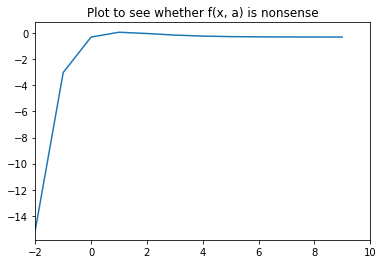

For a = -0.30000000000000004, f(x, a) has a root!
a: -0.2


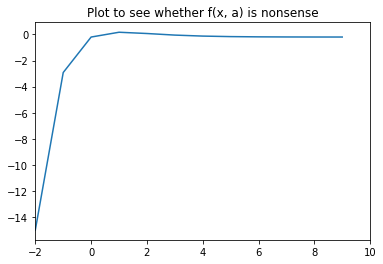

For a = -0.2, f(x, a) has a root!
a: -0.1


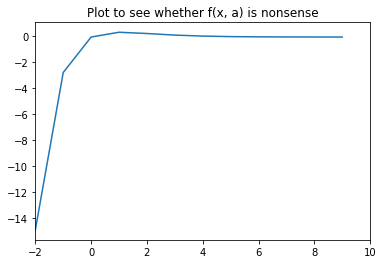

For a = -0.1, f(x, a) has a root!
a: 0.0


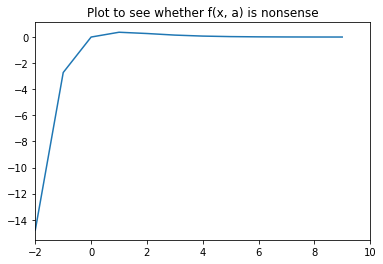

For a = 0.0, f(x, a) has a root!
a: 0.1


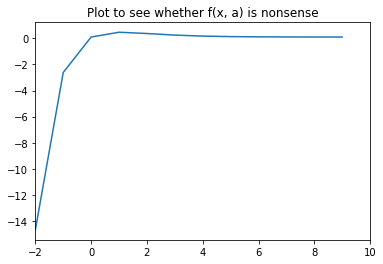

For a = 0.1, f(x, a) has a root!
a: 0.2


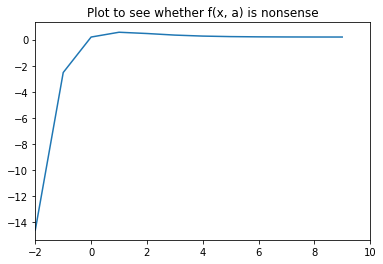

For a = 0.2, f(x, a) has a root!
a: 0.30000000000000004


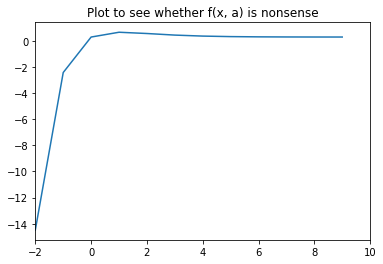

For a = 0.30000000000000004, f(x, a) has a root!
a: 0.4


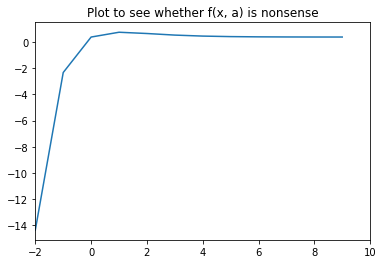

For a = 0.4, f(x, a) has a root!
a: 0.5


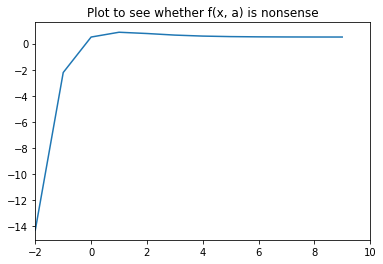

For a = 0.5, f(x, a) has a root!
a: 0.6000000000000001


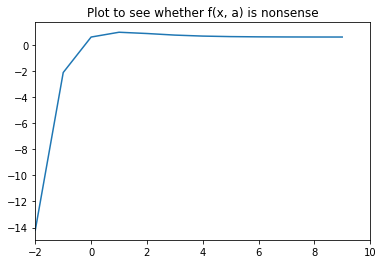

For a = 0.6000000000000001, f(x, a) has a root!
a: 0.7000000000000001


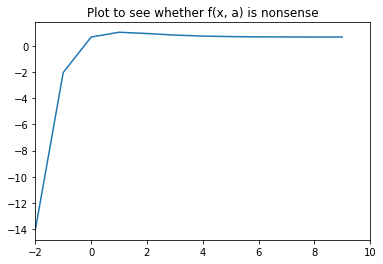

For a = 0.7000000000000001, f(x, a) has a root!
a: 0.8


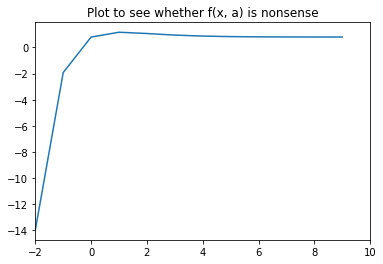

For a = 0.8, f(x, a) has a root!
a: 0.9


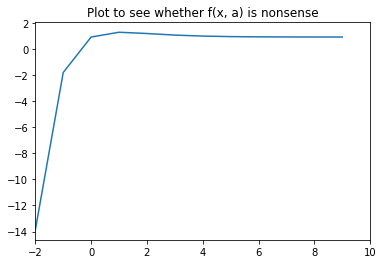

For a = 0.9, f(x, a) has a root!


In [7]:
# Make some x-values, after trial-and-error it seems negative 
# numbers grow increasingly larger so we start at -2
x = np.arange(-2, 10)
for a in np.arange(-10, 10) * 0.1:  # multiplied by 0.1 because setting the stepsize to a float increases float error
    print("a: {}".format(a))
    y = g(x, a)
    plot(x, y)
    if any(y >= 0):
        print("For a = {}, f(x, a) has a root!".format(a))

As we can see, the only graphs where this function has a root is when a >= -0.3

In [8]:
# Apply Newton's Method:
def Newton(x, a):
    # Initial guess
    for n in range(7):
        x = x - g(x, a) / fp(x)
    return x

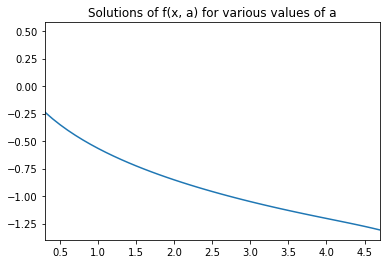

In [9]:
x = np.arange(-3, 48) * 0.1
y = np.empty(x.shape)
for i, a in enumerate(x):
    a = a
    y[i] = Newton(0, a)
plt.plot(x, y)
plt.xlim([0.3, 4.7])
plt.title("Solutions of f(x, a) for various values of a")
plt.show()

<ipython-input-6-58fe422f0909>:10: RuntimeWarning: overflow encountered in exp
  return x * np.exp(-x) + a
<ipython-input-3-249743eb1937>:6: RuntimeWarning: overflow encountered in exp
  return (1 - x) * np.exp(-x)
<ipython-input-8-049595a2891f>:5: RuntimeWarning: invalid value encountered in double_scalars
  x = x - g(x, a) / fp(x)


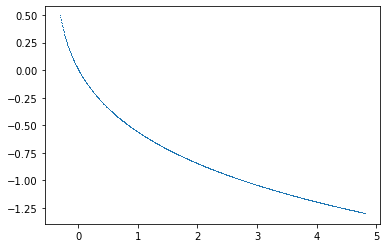

In [10]:
# Bifurcation diagram:
P=np.linspace(-0.3,4.8,1000)
X = []
Y = []
for a in P:
    # Add one value to X instead of resetting it.
    X.append(a)
    # Start with a random value of m instead of remaining stuck
    # on a particular branch of the diagram
    m = np.random.uniform(-1, 1)
    for n in range(1001):
      m = Newton(m, a)
    # The break is harmful here as it prevents completion of
    # the loop and collection of data in Y 
    for l in range(1051):
      m = Newton(m, a)
    Y.append(m)
plt.plot(X, Y, ls='', marker=',')
plt.show()

#### d.

D:\Programs\Anaconda\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


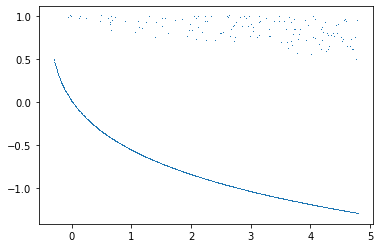

In [11]:
from scipy.optimize import fsolve

# Bifurcation diagram:
P=np.linspace(-0.3,4.8,1000)
X = []
Y = []
for a in P:
    # Add one value to X instead of resetting it.
    X.append(a)
    # Start with a random value of m instead of remaining stuck
    # on a particular branch of the diagram
    m = np.random.uniform(-1, 1)
    for n in range(1001):
      m = fsolve(g, m, a)
    for l in range(1051):
      m = fsolve(g, m, a)
    Y.append(m)
plt.plot(X, Y, ls='', marker=',')
plt.show()

### 2.
#### a.

In [17]:
'''
y' = f(x, y) = -2x - y, y(0) = 1
x_n = x_0 + nh
Euler: y_n+1 = y_n + hf(x_n, y_n)
x_0 = 0, y_0 = -1
For h = 0.5:
y_1 = -1 + 0.5 * f(0, -1)
y_1 = -1 + 0.5 * 1 = -0.5
x_1 = 1 * 0.5 = 0.5
y_2 = -0.5 + 0.5 * f(0.5, -0.5)
y_2 = -0.5 + 0.5 * -0.5 = -0.75
x_2 = 2 * 0.5 = 1
y_3 = -0.75 + 0.5 * f(1, -0.75)
y_3 = -0.75 + 0.5 * -1.25 = -1.375
For h = 0.25:
y_1 = -1 + 0.25 * f(0, -1)
y_1 = -1 + 0.25 * 1 = -0.75
x_1 = 0.25
y_2 = -0.75 + 0.25 * f(0.25, -0.75)
y_2 = -0.75 + 0.25 * 0.25 = -0.6875
x_2 = 0.5
y_3 = -0.6875 + 0.25 * f(0.5, -0.6875)
y_3 = -0.6875 + 0.25 * -0.3125 = -0.765625
x_3 = 0.75
y_4 = -0.765625 + 0.25 * f(0.75, -0.765625)
y_4 = -0.765625 + 0.25 * -0.734375 = -0.94921875
x_4 = 1.0
y_5 = -0.94921875 + 0.25 * f(1.0, -0.94921875)
y_5 = -0.94921875 + 0.25 * -1.05078125 = -1.2119140625
'''

"\ny' = f(x, y) = -2x - y, y(0) = 1\nx_n = x_0 + nh\nEuler: y_n+1 = y_n + hf(x_n, y_n)\nx_0 = 0, y_0 = -1\nFor h = 0.5:\ny_1 = -1 + 0.5 * f(0, -1)\ny_1 = -1 + 0.5 * 1 = -0.5\nx_1 = 1 * 0.5 = 0.5\ny_2 = -0.5 + 0.5 * f(0.5, -0.5)\ny_2 = -0.5 + 0.5 * -0.5 = -0.75\nx_2 = 2 * 0.5 = 1\ny_3 = -0.75 + 0.5 * f(1, -0.75)\ny_3 = -0.75 + 0.5 * -1.25 = -1.375\nFor h = 0.25:\ny_1 = -1 + 0.25 * f(0, -1)\ny_1 = -1 + 0.25 * 1 = -0.75\nx_1 = 0.25\ny_2 = -0.75 + 0.25 * f(0.25, -0.75)\ny_2 = -0.75 + 0.25 * 0.25 = -0.6875\nx_2 = 0.5\ny_3 = -0.6875 + 0.25 * f(0.5, -0.6875)\ny_3 = -0.6875 + 0.25 * -0.3125 = -0.765625\nx_3 = 0.75\ny_4 = -0.765625 + 0.25 * f(0.75, -0.765625)\ny_4 = -0.765625 + 0.25 * -0.734375 = -0.94921875\nx_4 = 1.0\ny_5 = -0.94921875 + 0.25 * f(1.0, -0.94921875)\ny_5 = -0.94921875 + 0.25 * -1.05078125 = -1.2119140625\n"

In [13]:
'''
Second-order RK: y~_n+1 = y_n + hf(x_n, y_n)
              y_n+1 = y_n + 0.5h(f(x_n, y_n) + f(x_n + h, y~_n+1))
With h = 0.5:
yw = -1 + 0.5 * f(0, -1)
yw = -1 + 0.5 * 1 = -0.5
y_1 = -1 + 0.5 * (f(0, -1) + f(0.5, -0.5))
y_1 = -1 + 0.5 * (1 + -0.5) = -0.875
x_1 = 0.5
yw = -0.875 + 0.5 * f(0.5, -0.875)
yw = -0.875 + 0.5 * -0.125 = -0.9375
y_2 = -0.875 + 0.5 * (f(0.5, -0.875) + f(1.0, -0.9375))
y_2 = -0.875 + 0.5 * (-0.125 + -1.0625) = -1.171875
x_2 = 1.0
yw = -1.171875 + 0.5 * f(1.0, -1.171875)
yw = -1.171875 + 0.5 * -0.828125 = -1.5859375
y_3 = -1.171875 + 0.5 * (f(1.0, -1.171875) + f(1.5, -1.5859375))
y_3 = -1.171875 + 0.5 * (-0.828125 + -1.4140625) = -1.732421875
With h = 0.25:
yw = -1 + 0.25 * f(0, -1)
yw = -1 + 0.25 * 1 = -0.75
y_1 = -1 + 0.25 * (f(0, -1) + f(0.25, -0.75))
y_1 = -1 + 0.25 * (1 + 0.25) = -0.84375
x_1 = 0.25
yw = -0.84375 + 0.25 * f(0.25, -0.84375)
yw = -0.84375 + 0.25 * 0.34375 = -0.7578125
y_2 = -0.84375 + 0.25 * (f(0.25, -0.84375) + f(0.5, -0.7578125))
y_2 = -0.84375 + 0.25 * (0.34375 + -0.2421875) = -0.8310546875
x_2 = 0.5
yw = -0.8310546875 + 0.25 * f(0.5, -0.8310546875)
yw = -0.8310546875 + 0.25 * -0.1689453125 = -0.873291015625
y_3 = -0.8310546875 + 0.25 * (f(0.5, -0.8310546875) + f(0.75, -0.873291015625))
y_3 = -0.8310546875 + 0.25 * (-0.1689453125 + -0.626708984375) = -0.930511474609375
x_3 = 0.75
yw = -0.930511474609375 + 0.25 * f(0.75, -0.930511474609375)
yw = -0.930511474609375 + 0.25 * -0.569488525390625 = -1.0728836059570312
y_4 = -0.930511474609375 + 0.25 * (f(0.75, -0.930511474609375) + f(1.0, -1.0728836059570312))
y_4 = -0.930511474609375 + 0.25 * (-0.569488525390625 + -0.9271163940429688) = -1.1175870895385742
x_4 = 1.0
yw = -1.1175870895385742 + 0.25 * f(1.0, -1.1175870895385742)
yw = -1.1175870895385742 + 0.25 * -0.8824129104614258 = -1.3381903171539307
y_5 = -1.1175870895385742 + 0.25 * (f(1.0, -1.1175870895385742) + f(1.25, -1.3381903171539307))
y_5 = -1.1175870895385742 + 0.25 * (-0.8824129104614258 + -1.1618096828460693) = -1.373114913702011
'''

'\nSecond-order RK: y~_n+1 = y_n + hf(x_n, y_n)\n              y_n+1 = y_n + 0.5h(f(x_n, y_n) + f(x_n + h, y~_n+1))\nWith h = 0.5:\nyw = -1 + 0.5 * f(0, -1)\nyw = -1 + 0.5 * 1 = -0.5\ny_1 = -1 + 0.5 * (f(0, -1) + f(0.5, -0.5))\ny_1 = -1 + 0.5 * (1 + -0.5) = -0.875\nx_1 = 0.5\nyw = -0.875 + 0.5 * f(0.5, -0.875)\nyw = -0.875 + 0.5 * -0.125 = -0.9375\ny_2 = -0.875 + 0.5 * (f(0.5, -0.875) + f(1.0, -0.9375))\ny_2 = -0.875 + 0.5 * (-0.125 + -1.0625) = -1.171875\nx_2 = 1.0\nyw = -1.171875 + 0.5 * f(1.0, -1.171875)\nyw = -1.171875 + 0.5 * -0.828125 = -1.5859375\ny_3 = -1.171875 + 0.5 * (f(1.0, -1.171875) + f(1.5, -1.5859375))\ny_3 = -1.171875 + 0.5 * (-0.828125 + -1.4140625) = -1.732421875\nWith h = 0.25:\nyw = -1 + 0.25 * f(0, -1)\nyw = -1 + 0.25 * 1 = -0.75\ny_1 = -1 + 0.25 * (f(0, -1) + f(0.25, -0.75))\ny_1 = -1 + 0.25 * (1 + 0.25) = -0.84375\nx_1 = 0.25\nyw = -0.84375 + 0.25 * f(0.25, -0.84375)\nyw = -0.84375 + 0.25 * 0.34375 = -0.7578125\ny_2 = -0.84375 + 0.25 * (f(0.25, -0.84375) + f(0.5

In [14]:
def f(x, y):
    return -2 * x - y

x = 0
y = -1
h = 0.25
counter = 1
while x <= 1:
    yw = y + h * f(x, y)
    print("yw =", y, "+", h, "* f{}".format((x, y)))
    print("yw =", y, "+", h, "*", f(x, y), "=", yw)
    y_old = y
    y = y + 0.5 * h * (f(x, y) + f(x + h, yw))
    print("y_{} =".format(counter), y_old, "+", h, "* (f{} + f{})".format((x, y_old), (x + h, yw)))
    print("y_{} =".format(counter), y_old, "+", h, "* ({} + {})".format(f(x, y_old), f(x + h, yw)), "=", y)
    x = x + h
    print("x_{} =".format(counter), x)
    counter = counter + 1

yw = -1 + 0.25 * f(0, -1)
yw = -1 + 0.25 * 1 = -0.75
y_1 = -1 + 0.25 * (f(0, -1) + f(0.25, -0.75))
y_1 = -1 + 0.25 * (1 + 0.25) = -0.84375
x_1 = 0.25
yw = -0.84375 + 0.25 * f(0.25, -0.84375)
yw = -0.84375 + 0.25 * 0.34375 = -0.7578125
y_2 = -0.84375 + 0.25 * (f(0.25, -0.84375) + f(0.5, -0.7578125))
y_2 = -0.84375 + 0.25 * (0.34375 + -0.2421875) = -0.8310546875
x_2 = 0.5
yw = -0.8310546875 + 0.25 * f(0.5, -0.8310546875)
yw = -0.8310546875 + 0.25 * -0.1689453125 = -0.873291015625
y_3 = -0.8310546875 + 0.25 * (f(0.5, -0.8310546875) + f(0.75, -0.873291015625))
y_3 = -0.8310546875 + 0.25 * (-0.1689453125 + -0.626708984375) = -0.930511474609375
x_3 = 0.75
yw = -0.930511474609375 + 0.25 * f(0.75, -0.930511474609375)
yw = -0.930511474609375 + 0.25 * -0.569488525390625 = -1.0728836059570312
y_4 = -0.930511474609375 + 0.25 * (f(0.75, -0.930511474609375) + f(1.0, -1.0728836059570312))
y_4 = -0.930511474609375 + 0.25 * (-0.569488525390625 + -0.9271163940429688) = -1.1175870895385742
x_4 = 1.0
yw =

In [21]:
def f(x, y):
    return -2 * x - y

def euler(h):
    x = np.empty(int(1 / h + 1))
    y = np.empty(x.shape)
    x[0] = 0
    y[0] = -1
    for i in range(len(x) - 1):
        y[i+1] = y[i] + h * f(x[i], y[i])
        x[i+1] = x[i] + h
    return y
    
def rk2(h):
    x = np.empty(int(1 / h + 1))
    y = np.empty(x.shape)
    x[0] = 0
    y[0] = -1
    for i in range(len(x) - 1):
        yw = y[i] + h * f(x[i], y[i])
        y[i+1] = y[i] + 0.5 * h * (f(x[i], y[i]) + f(x[i] + h, yw))
        x[i+1] = x[i] + h
    return y

def rk4(h):
    x = np.empty(int(1 / h + 1))
    y = np.empty(x.shape)
    x[0] = 0
    y[0] = -1
    for i in range(len(x) - 1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k1)
        k3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * k2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y

def plot(ye, yrk2, yrk4, y_true, h):
    # X-values
    x = np.arange(0, int(1 / h + 1)) * h
    
    # Estimations
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title("Estimation of f(x) with h = {}".format(h))
    plt.plot(x, ye, label="Euler", color="red")
    plt.plot(x, yrk2, label="RK2", color="orange")
    plt.plot(x, yrk4, label="RK4", color="green")
    plt.plot(x, y_true, label="True", color="blue")
    plt.legend()
    
    # Errors
    plt.subplot(1, 2, 2)
    plt.title("Error of the estimations with h = {}".format(h))
    plt.plot(x, np.absolute(ye - y_true), label="Euler", color="red")
    plt.plot(x, np.absolute(yrk2 - y_true), label="RK2", color="orange")
    plt.plot(x, np.absolute(yrk4 - y_true), label="RK4", color="green")
    plt.legend()
    plt.tight_layout()
    plt.show()

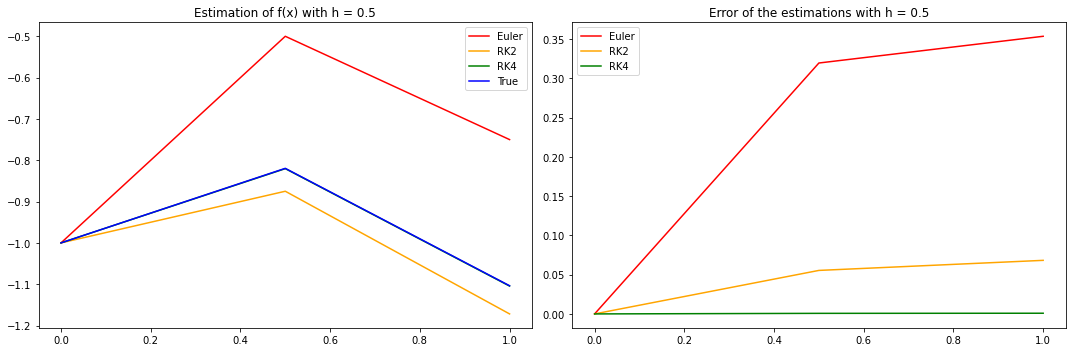

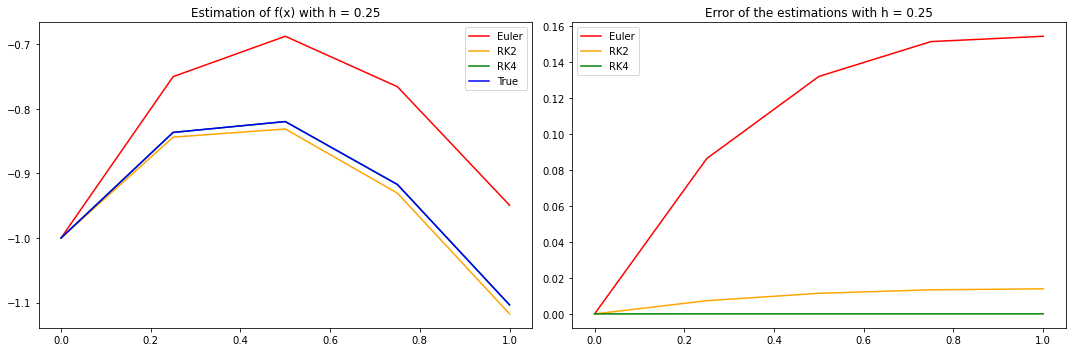

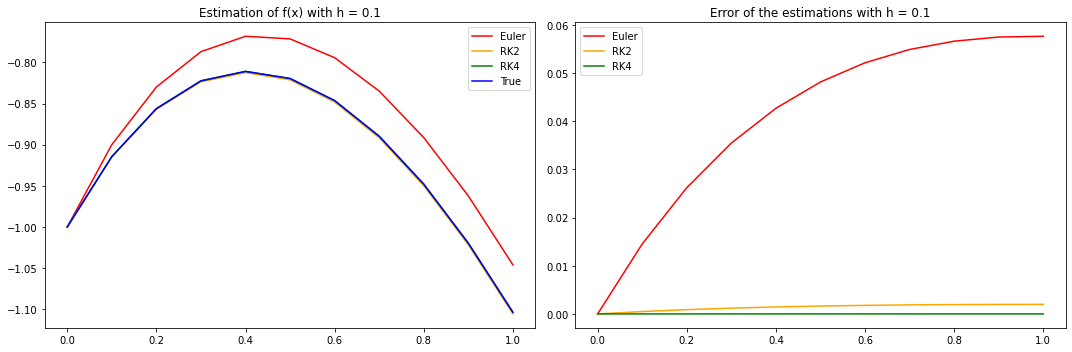

In [23]:
for h in [0.5, 0.25, 0.1]:    
    # Get estimations and true values
    x = np.arange(1 / h + 1) * h
    ye = euler(h)
    yrk2 = rk2(h)
    yrk4 = rk4(h)
    y_true = -3 * np.exp(-x) - 2 * x + 2
    
    # Plot results
    plot(ye, yrk2, yrk4, y_true, h)

#### d.

In [58]:
import math

def wiggle(I, p):
    h = 0.1
    x = np.empty(int(30 / h + 1))
    y1 = np.empty(x.shape)
    y2 = np.empty(x.shape)
    y1[0] = 1
    y2[0] = 1
    # y1 = theta, y2 = v
    for i in range(len(x) - 1):
        y1[i+1] = y1[i] + h * ((1 - math.sin(y1[i])) * h + y2[0])
        y2[i+1] = y2[i] + h * (I - math.sin(y1[i]))

    plt.tight_layout()
    plt.subplot(2, 2, p)
    plt.title("Euler estimation of a pendulum")
    plt.plot(y1, y2)

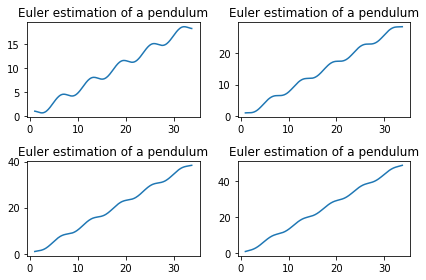

In [59]:
for p, I in enumerate([0.66, 1, 1.33, 1.67]):
    wiggle(I, p + 1)
plt.show()